# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import missingno as msno



In [2]:
# Print out any information you need to understand your dataframe

df = pd.read_csv('Rat_Sightings.csv') 

df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

Unique Key            Created Date             Closed Date Agency  \
0    31464015  09/04/2015 12:00:00 AM  09/18/2015 12:00:00 AM  DOHMH   
1    31464024  09/04/2015 12:00:00 AM  10/28/2015 12:00:00 AM  DOHMH   
2    31464025  09/04/2015 12:00:00 AM                     NaN  DOHMH   
3    31464026  09/04/2015 12:00:00 AM  09/14/2015 12:00:00 AM  DOHMH   
4    31464027  09/04/2015 12:00:00 AM  09/22/2015 12:00:00 AM  DOHMH   

                               Agency Name Complaint Type    Descriptor  \
0  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
1  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
2  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
3  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
4  Department of Health and Mental Hygiene         Rodent  Rat Sighting   

                  Location Type  Incident Zip      Incident Address  ...  \
0  3+ Family Mixed Use Building       10006.0                   NaN  ...   
1           Commercial Building       10306.0  2270 HYLAN BOULEVARD  ...   
2           1-2 Family Dwelling       10310.0       758 POST AVENUE  ...   
3       3+ Family Apt. Building       11206.0    198 SCHOLES STREET  ...   
4  3+ Family Mixed Use Building       10462.0   2138 WALLACE AVENUE  ...   

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
1                 NaN                      NaN       NaN   
2                 NaN                      NaN       NaN   
3                 NaN                      NaN       NaN   
4                 NaN                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
1                    NaN             NaN             NaN                 NaN   
2                    NaN             NaN             NaN                 NaN   
3                    NaN             NaN             NaN                 NaN   
4                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                 Location  
0  40.707772 -74.012963  (40.70777155363643, -74.01296309970473)  
1  40.575209 -74.104547  (40.575209242947444, -74.1045465185469)  
2  40.631236 -74.126878  (40.63123555151668, -74.12687759748677)  
3  40.708987 -73.941207  (40.70898692345805, -73.94120690238431)  
4  40.854130 -73.864813  (40.85413014360452, -73.86481331044513)  

[5 rows x 52 columns]

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

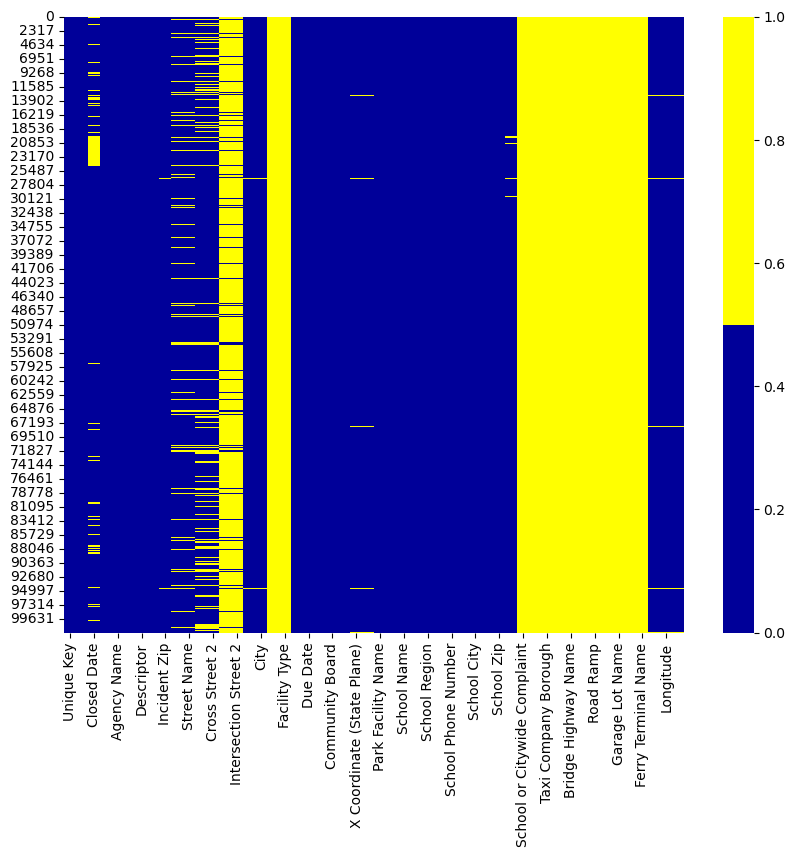

In [3]:
# Plot a heatmap of any missing data
plt.figure(figsize=(10,8))

cols = df.columns[:52]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

In [4]:
# Try out a missing data percentage list! 
num_missing = df.isna().sum()
pct_missing = df.isna().mean()

print(pct_missing)

Unique Key                        0.000000
Created Date                      0.000000
Closed Date                       0.107257
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        0.000000
Location Type                     0.000059
Incident Zip                      0.003297
Incident Address                  0.089036
Street Name                       0.089046
Cross Street 1                    0.163442
Cross Street 2                    0.163766
Intersection Street 1             0.912426
Intersection Street 2             0.912426
Address Type                      0.003395
City                              0.003356
Landmark                          0.999657
Facility Type                     1.000000
Status                            0.000000
Due Date                          0.001148
Resolution Action Updated Date    0.000029
Community Board                   0.000000
Borough    

<Axes: >

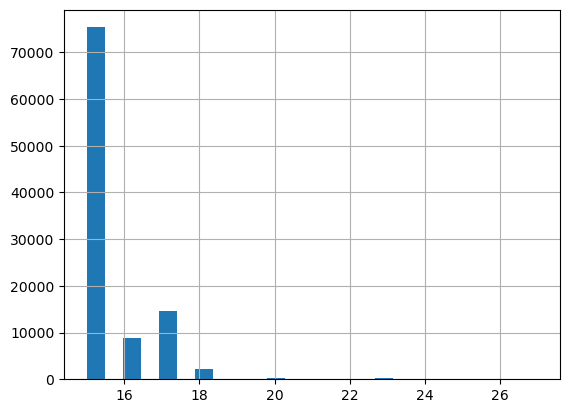

In [5]:
# Plot a missing data histogram
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=25)

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [6]:
# Handle any missing data in your dataframe.

print(df.shape)
df_less_missing_cols = df.loc[:, pct_missing <= .04].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
print(df_less_missing_cols.shape)

pct_missing = df_less_missing_cols.isna().mean()

print(pct_missing)


(101914, 52)
(101914, 32)
Unique Key                        0.000000
Created Date                      0.000000
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        0.000000
Location Type                     0.000059
Incident Zip                      0.003297
Address Type                      0.003395
City                              0.003356
Status                            0.000000
Due Date                          0.001148
Resolution Action Updated Date    0.000029
Community Board                   0.000000
Borough                           0.000000
X Coordinate (State Plane)        0.006927
Y Coordinate (State Plane)        0.006927
Park Facility Name                0.000000
Park Borough                      0.000000
School Name                       0.000000
School Number                     0.000000
School Region                     0.000000
School Code                 

In [16]:
df_less_missing_rows_and_cols = df_less_missing_cols[missing_by_row < 16].copy()
print(df_less_missing_rows_and_cols.shape)

pct_missing = df_less_missing_rows_and_cols.isna().mean()

print(pct_missing)

(75364, 32)
Unique Key                        0.0
Created Date                      0.0
Agency                            0.0
Agency Name                       0.0
Complaint Type                    0.0
Descriptor                        0.0
Location Type                     0.0
Incident Zip                      0.0
Address Type                      0.0
City                              0.0
Status                            0.0
Due Date                          0.0
Resolution Action Updated Date    0.0
Community Board                   0.0
Borough                           0.0
X Coordinate (State Plane)        0.0
Y Coordinate (State Plane)        0.0
Park Facility Name                0.0
Park Borough                      0.0
School Name                       0.0
School Number                     0.0
School Region                     0.0
School Code                       0.0
School Phone Number               0.0
School Address                    0.0
School City                       0.0


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

KeyError: "None of [Index(['City'], dtype='object')] are in the [columns]"

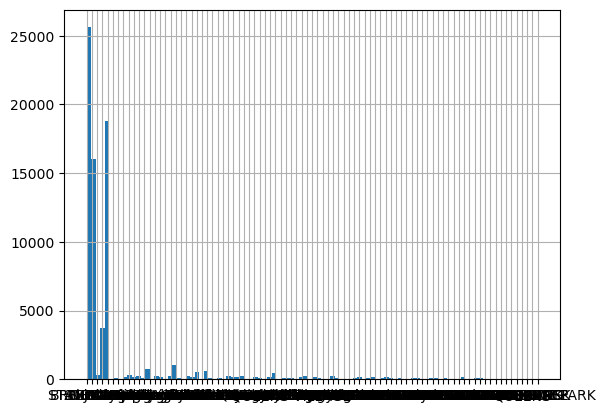

In [18]:
# Plot a histogram to see if there are any outliers.

df_less_missing_rows_and_cols['City'].hist(bins=100)

df_less_missing_rows_and_cols.boxplot(column=['City'])


In [19]:
# Use the describe() method
df_less_missing_rows_and_cols.describe()

Unique Key  Incident Zip  X Coordinate (State Plane)  \
count  7.536400e+04  75364.000000                7.536400e+04   
mean   2.792478e+07  10738.712157                1.002995e+06   
std    5.594263e+06    539.202304                1.975803e+04   
min    1.755275e+07  10000.000000                9.134950e+05   
25%    2.333173e+07  10301.000000                9.942335e+05   
50%    2.814677e+07  10472.000000                1.002129e+06   
75%    3.297113e+07  11222.000000                1.012561e+06   
max    3.718873e+07  11694.000000                1.066922e+06   

       Y Coordinate (State Plane)      Latitude     Longitude  
count                75364.000000  75364.000000  75364.000000  
mean                208842.305849     40.739858    -73.932320  
std                  30226.544010      0.082966      0.071257  
min                 121350.000000     40.499502    -74.254437  
25%                 186696.000000     40.679062    -73.963983  
50%                 203491.000000     40.725168    -73.935488  
75%                 237316.000000     40.818012    -73.897702  
max                 271876.000000     40.912869    -73.701632

<Axes: xlabel='Borough'>

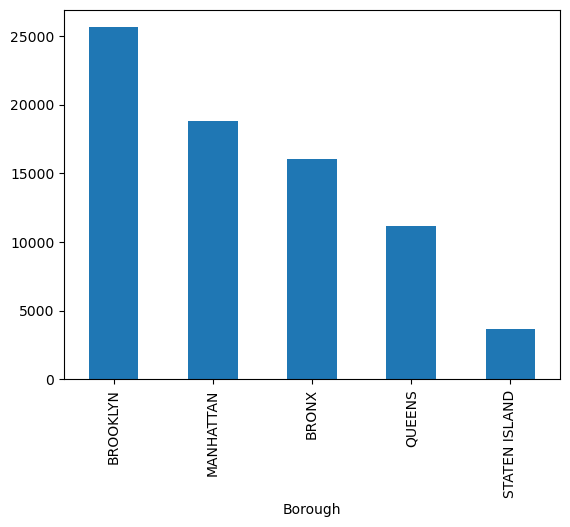

In [21]:
# Plot a bar chart
df_less_missing_rows_and_cols['Borough'].value_counts().plot(kind='bar')


Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [11]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [12]:
# Look for any irrelevant data in the dataframe. How will you handle it?

In [25]:
# Look for duplicates. How will you handle any duplicates?

num_rows = len(df_less_missing_rows_and_cols)

for col in df_less_missing_rows_and_cols.columns:
    cnts = df_less_missing_rows_and_cols[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()
        
df_less_missing_rows_and_cols.drop_duplicates()


Agency: 100.00%
Agency
DOHMH    75364
Name: count, dtype: int64

Agency Name: 100.00%
Agency Name
Department of Health and Mental Hygiene    75364
Name: count, dtype: int64

Complaint Type: 100.00%
Complaint Type
Rodent    75364
Name: count, dtype: int64

Descriptor: 100.00%
Descriptor
Rat Sighting    75364
Name: count, dtype: int64

Park Facility Name: 100.00%
Park Facility Name
Unspecified    75364
Name: count, dtype: int64

School Name: 100.00%
School Name
Unspecified    75364
Name: count, dtype: int64

School Number: 100.00%
School Number
Unspecified    75364
Name: count, dtype: int64

School Region: 100.00%
School Region
Unspecified    75364
Name: count, dtype: int64

School Code: 100.00%
School Code
Unspecified    75364
Name: count, dtype: int64

School Phone Number: 100.00%
School Phone Number
Unspecified    75364
Name: count, dtype: int64

School Address: 100.00%
School Address
Unspecified    75364
Name: count, dtype: int64

School City: 100.00%
School City
Unspecified    75364

Unique Key            Created Date Agency  \
3         31464026  09/04/2015 12:00:00 AM  DOHMH   
4         31464027  09/04/2015 12:00:00 AM  DOHMH   
5         31464188  09/04/2015 12:00:00 AM  DOHMH   
6         31464195  09/04/2015 12:00:00 AM  DOHMH   
9         31464802  09/04/2015 12:00:00 AM  DOHMH   
...            ...                     ...    ...   
101907    35493933  02/14/2017 12:00:00 AM  DOHMH   
101908    35494905  02/14/2017 12:00:00 AM  DOHMH   
101909    35494908  02/15/2017 12:00:00 AM  DOHMH   
101911    35494945  02/14/2017 12:00:00 AM  DOHMH   
101912    35494970  02/14/2017 12:00:00 AM  DOHMH   

                                    Agency Name Complaint Type    Descriptor  \
3       Department of Health and Mental Hygiene         Rodent  Rat Sighting   
4       Department of Health and Mental Hygiene         Rodent  Rat Sighting   
5       Department of Health and Mental Hygiene         Rodent  Rat Sighting   
6       Department of Health and Mental Hygiene         Rodent  Rat Sighting   
9       Department of Health and Mental Hygiene         Rodent  Rat Sighting   
...                                         ...            ...           ...   
101907  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
101908  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
101909  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
101911  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
101912  Department of Health and Mental Hygiene         Rodent  Rat Sighting   

                       Location Type  Incident Zip Address Type  \
3            3+ Family Apt. Building       11206.0      ADDRESS   
4       3+ Family Mixed Use Building       10462.0      ADDRESS   
5            3+ Family Apt. Building       11231.0      ADDRESS   
6            3+ Family Apt. Building       11354.0      ADDRESS   
9                1-2 Family Dwelling       10303.0      ADDRESS   
...                              ...           ...          ...   
101907           1-2 Family Dwelling       11106.0      ADDRESS   
101908       3+ Family Apt. Building       11216.0      ADDRESS   
101909  3+ Family Mixed Use Building       11207.0      ADDRESS   
101911  3+ Family Mixed Use Building       11213.0      ADDRESS   
101912           1-2 Family Dwelling       11105.0      ADDRESS   

                 City  ...  School Code School Phone Number School Address  \
3            BROOKLYN  ...  Unspecified         Unspecified    Unspecified   
4               BRONX  ...  Unspecified         Unspecified    Unspecified   
5            BROOKLYN  ...  Unspecified         Unspecified    Unspecified   
6            Flushing  ...  Unspecified         Unspecified    Unspecified   
9       STATEN ISLAND  ...  Unspecified         Unspecified    Unspecified   
...               ...  ...          ...                 ...            ...   
101907        Astoria  ...  Unspecified         Unspecified    Unspecified   
101908       BROOKLYN  ...  Unspecified         Unspecified    Unspecified   
101909       BROOKLYN  ...  Unspecified         Unspecified    Unspecified   
101911       BROOKLYN  ...  Unspecified         Unspecified    Unspecified   
101912        Astoria  ...  Unspecified         Unspecified    Unspecified   

        School City School State   School Zip  School Not Found   Latitude  \
3       Unspecified  Unspecified  Unspecified                 N  40.708987   
4       Unspecified  Unspecified  Unspecified                 N  40.854130   
5       Unspecified  Unspecified  Unspecified                 N  40.677223   
6       Unspecified  Unspecified  Unspecified                 N  40.767627   
9       Unspecified  Unspecified  Unspecified                 N  40.637298   
...             ...          ...          ...               ...        ...   
101907  Unspecified  Unspecified  Unspecified                 N  40.759181   
101908  Unspecified  Unspecified  Unspecifie

In [24]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [28]:
# Try to convert all the strings in a column to lower or upper case. 
def lowercase_strings(x):
    if isinstance(x, str):
        return x.lower()
    else:
        return x

# Apply the function to all elements in the DataFrame
df_less_missing_rows_and_cols = df_less_missing_rows_and_cols.applymap(lowercase_strings)

df_less_missing_rows_and_cols.value_counts(dropna=False)

C:\Users\kyler\AppData\Local\Temp\ipykernel_13512\350581424.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_less_missing_rows_and_cols = df_less_missing_rows_and_cols.applymap(lowercase_strings)


Unique Key  Created Date            Agency  Agency Name                              Complaint Type  Descriptor    Location Type            Incident Zip  Address Type  City      Status   Due Date                Resolution Action Updated Date  Community Board  Borough    X Coordinate (State Plane)  Y Coordinate (State Plane)  Park Facility Name  Park Borough  School Name  School Number  School Region  School Code  School Phone Number  School Address  School City  School State  School Zip   School Not Found  Latitude   Longitude   Location                                
17552750    07/01/2010 12:00:00 am  dohmh   department of health and mental hygiene  rodent          rat sighting  other (explain below)    10023.0       intersection  new york  closed   07/31/2010 02:34:02 am  07/14/2010 12:00:00 am          07 manhattan     manhattan  989213.0                    222698.0                    unspecified         manhattan     unspecified  unspecified    unspecified    unspecified  unspeci